In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from scipy.stats import norm
from IPython.display import Image 
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from scipy.stats import mannwhitneyu
from sklearn.preprocessing import MinMaxScaler


In [2]:
Faltante_gondola = pd.read_excel(r'd:\LocalData\la02964\Desktop\Ciencia de Datos\gondolasv2.xlsx')

In [3]:
np.shape (Faltante_gondola)

(326928, 30)

In [4]:
columnas=Faltante_gondola.columns
columnas

Index(['Unnamed: 0', 'IDRENGLON', 'ID_MUESTRA', 'CODIGO_EAN', 'MARCA',
       'ID_VALIDO', 'ID_MOT_CADENA', 'ID_MOT_PROV', 'ID_SUBMOTIVO', 'STOCK_CD',
       'PROVEEDOR', 'CADENA', 'ZONA', 'TAMANIO', 'C_TAMANIO', 'IDROTACION',
       'ENTREGA', 'IDALMACEN', 'FECHA_RELGS1', 'ANIO', 'LECTURA',
       'LECTURA_HORA', 'DIASEMANAL', 'QUIEBRE', 'IDGRUPO', 'CAT2', 'CAT3',
       'SUB_CAT3', 'CATEGORIA', 'ORIGEN'],
      dtype='object')

In [5]:
Faltante_gondola.head(5)

,Unnamed: 0,IDRENGLON,ID_MUESTRA,CODIGO_EAN,MARCA,ID_VALIDO,ID_MOT_CADENA,ID_MOT_PROV,ID_SUBMOTIVO,STOCK_CD,...,LECTURA,LECTURA_HORA,DIASEMANAL,QUIEBRE,IDGRUPO,CAT2,CAT3,SUB_CAT3,CATEGORIA,ORIGEN
0,0,1588433,11131,Producto 279,Marca 1662,0,0,0,0,1036,...,1,9:21:44,Lunes,N,1,SNACK PAPAS FRITAS,ALIMENTOS,SECOS,AS,Cadena
1,1,1588434,11131,Producto 281,Marca 1662,0,0,0,0,1176,...,2,11:28:56,Lunes,N,1,SNACK PAPAS FRITAS,ALIMENTOS,SECOS,AS,Cadena
2,2,1588435,11131,Producto 285,Marca 1662,0,0,0,0,1188,...,1,9:22:23,Lunes,N,1,SNACK PAPAS FRITAS,ALIMENTOS,SECOS,AS,Cadena
3,3,1588436,11131,Producto 999,Marca 1459,0,0,0,0,192,...,1,9:44:12,Lunes,N,1,CREMA CORPORAL Y MANOS,HIGIENE PERSONAL,HIGIENE PERSONAL,HP,Cadena
4,4,1588437,11131,Producto 359,Marca 1334,0,0,0,0,1656,...,1,9:43:57,Lunes,N,1,FIDEOS SECOS,ALIMENTOS,SECOS,AS,Cadena


In [6]:
marcas=np.unique(Faltante_gondola.MARCA)
marcas
np.shape(marcas)

(1901,)

In [7]:
Faltante_gondola.isnull().any() 

Unnamed: 0       False
IDRENGLON        False
ID_MUESTRA       False
CODIGO_EAN       False
MARCA            False
ID_VALIDO        False
ID_MOT_CADENA    False
ID_MOT_PROV      False
ID_SUBMOTIVO     False
STOCK_CD         False
PROVEEDOR        False
CADENA           False
ZONA             False
TAMANIO          False
C_TAMANIO        False
IDROTACION        True
ENTREGA           True
IDALMACEN         True
FECHA_RELGS1     False
ANIO             False
LECTURA          False
LECTURA_HORA      True
DIASEMANAL       False
QUIEBRE          False
IDGRUPO          False
CAT2             False
CAT3             False
SUB_CAT3         False
CATEGORIA        False
ORIGEN           False
dtype: bool

In [8]:
producto=np.unique(Faltante_gondola.CODIGO_EAN)
producto
np.shape(producto)


(13063,)

In [9]:
cadena=np.unique(Faltante_gondola.CADENA)
cadena
np.shape(cadena)

(14,)

In [10]:
total = Faltante_gondola.isnull().sum().sort_values(ascending=False) 
porcentaje = (Faltante_gondola.isnull().sum()/Faltante_gondola.isnull().count()).sort_values(ascending=False)
Datos_perdidos = pd.concat([total,porcentaje],axis=1,keys=['Total nulos','Porcentaje'])
Datos_perdidos.head(7)

,Total nulos,Porcentaje
IDROTACION,49146,0.150327
ENTREGA,49146,0.150327
IDALMACEN,49146,0.150327
LECTURA_HORA,16234,0.049656
ID_MOT_PROV,0,0.000000
PROVEEDOR,0,0.000000
STOCK_CD,0,0.000000


In [11]:
Faltante_gondola.drop(['ID_MOT_CADENA','ID_MOT_PROV','ID_SUBMOTIVO','TAMANIO','IDGRUPO','CATEGORIA','ORIGEN'], axis='columns', inplace=True)

In [12]:
Faltante_gondola.head()

,Unnamed: 0,IDRENGLON,ID_MUESTRA,CODIGO_EAN,MARCA,ID_VALIDO,STOCK_CD,PROVEEDOR,CADENA,ZONA,...,IDALMACEN,FECHA_RELGS1,ANIO,LECTURA,LECTURA_HORA,DIASEMANAL,QUIEBRE,CAT2,CAT3,SUB_CAT3
0,0,1588433,11131,Producto 279,Marca 1662,0,1036,Proveedor 217,Cadena 5,CABA ...,...,S,20/05/2019,20192,1,9:21:44,Lunes,N,SNACK PAPAS FRITAS,ALIMENTOS,SECOS
1,1,1588434,11131,Producto 281,Marca 1662,0,1176,Proveedor 217,Cadena 5,CABA ...,...,S,20/05/2019,20192,2,11:28:56,Lunes,N,SNACK PAPAS FRITAS,ALIMENTOS,SECOS
2,2,1588435,11131,Producto 285,Marca 1662,0,1188,Proveedor 217,Cadena 5,CABA ...,...,S,20/05/2019,20192,1,9:22:23,Lunes,N,SNACK PAPAS FRITAS,ALIMENTOS,SECOS
3,3,1588436,11131,Producto 999,Marca 1459,0,192,Proveedor 66,Cadena 5,CABA ...,...,X,20/05/2019,20192,1,9:44:12,Lunes,N,CREMA CORPORAL Y MANOS,HIGIENE PERSONAL,HIGIENE PERSONAL
4,4,1588437,11131,Producto 359,Marca 1334,0,1656,Proveedor 279,Cadena 5,CABA ...,...,S,20/05/2019,20192,1,9:43:57,Lunes,N,FIDEOS SECOS,ALIMENTOS,SECOS


In [13]:
Faltante_gondola.drop(['LECTURA_HORA'], axis='columns', inplace=True)

In [14]:
Faltante_gondola.drop(Faltante_gondola.columns[Faltante_gondola.columns.str.contains('unnamed',case = False)],axis = 1) 

,IDRENGLON,ID_MUESTRA,CODIGO_EAN,MARCA,ID_VALIDO,STOCK_CD,PROVEEDOR,CADENA,ZONA,C_TAMANIO,...,ENTREGA,IDALMACEN,FECHA_RELGS1,ANIO,LECTURA,DIASEMANAL,QUIEBRE,CAT2,CAT3,SUB_CAT3
0,1588433,11131,Producto 279,Marca 1662,0,1036,Proveedor 217,Cadena 5,CABA ...,SUPER,...,CENTRALIZADA ...,S,20/05/2019,20192,1,Lunes,N,SNACK PAPAS FRITAS,ALIMENTOS,SECOS
1,1588434,11131,Producto 281,Marca 1662,0,1176,Proveedor 217,Cadena 5,CABA ...,SUPER,...,CENTRALIZADA ...,S,20/05/2019,20192,2,Lunes,N,SNACK PAPAS FRITAS,ALIMENTOS,SECOS
2,1588435,11131,Producto 285,Marca 1662,0,1188,Proveedor 217,Cadena 5,CABA ...,SUPER,...,CENTRALIZADA ...,S,20/05/2019,20192,1,Lunes,N,SNACK PAPAS FRITAS,ALIMENTOS,SECOS
3,1588436,11131,Producto 999,Marca 1459,0,192,Proveedor 66,Cadena 5,CABA ...,SUPER,...,CENTRALIZADA ...,X,20/05/2019,20192,1,Lunes,N,CREMA CORPORAL Y MANOS,HIGIENE PERSONAL,HIGIENE PERSONAL
4,1588437,11131,Producto 359,Marca 1334,0,1656,Proveedor 279,Cadena 5,CABA ...,SUPER,...,CENTRALIZADA ...,S,20/05/2019,20192,1,Lunes,N,FIDEOS SECOS,ALIMENTOS,SECOS
5,1588438,11131,Producto 1143,Marca 84,0,0,Proveedor 118,Cadena 5,CABA ...,SUPER,...,CENTRALIZADA ...,S,20/05/2019,20192,1,Lunes,N,LICORES,BEBIDAS,CON ALCOHOL
6,1588439,11131,Producto 1144,Marca 84,0,12,Proveedor 118,Cadena 5,CABA ...,SUPER,...,CENTRALIZADA ...,S,20/05/2019,20192,1,Lunes,N,LICORES,BEBIDAS,CON ALCOHOL
7,1588440,11131,Producto 1146,Marca 462,0,0,Proveedor 135,Cadena 5,CABA ...,SUPER,...,CENTRALIZADA ...,S,20/05/2019,20192,1,Lunes,N,CREMA DENTAL,HIGIENE PERSONAL,HIGIENE PERSONAL
8,1588441,11131,Producto 1152,Marca 109,0,4979,Proveedor 512,Cadena 5,CABA ...,SUPER,...,CENTRALIZADA ...,S,20/05/2019,20192,1,Lunes,N,JABON LAVA ROPA LIQUIDO,CUIDADO DEL HOGAR,CUIDADO DEL HOGAR
9,1588442,11131,Producto 1162,Marca 1557,0,360,Proveedor 512,Cadena 5,CABA ...,SUPER,...,CENTRALIZADA ...,S,20/05/2019,20192,1,Lunes,N,"SHAMPOO, ACONDICIONADOR Y CUIDADOS DEL CABELLO",HIGIENE PERSONAL,HIGIENE PERSONAL


In [15]:
np.shape (Faltante_gondola)

(326928, 22)

In [16]:
Faltante_gondola.isnull().any()

Unnamed: 0      False
IDRENGLON       False
ID_MUESTRA      False
CODIGO_EAN      False
MARCA           False
ID_VALIDO       False
STOCK_CD        False
PROVEEDOR       False
CADENA          False
ZONA            False
C_TAMANIO       False
IDROTACION       True
ENTREGA          True
IDALMACEN        True
FECHA_RELGS1    False
ANIO            False
LECTURA         False
DIASEMANAL      False
QUIEBRE         False
CAT2            False
CAT3            False
SUB_CAT3        False
dtype: bool

In [17]:
Faltante_gondola.dtypes

Unnamed: 0       int64
IDRENGLON        int64
ID_MUESTRA       int64
CODIGO_EAN      object
MARCA           object
ID_VALIDO        int64
STOCK_CD        object
PROVEEDOR       object
CADENA          object
ZONA            object
C_TAMANIO       object
IDROTACION      object
ENTREGA         object
IDALMACEN       object
FECHA_RELGS1    object
ANIO             int64
LECTURA          int64
DIASEMANAL      object
QUIEBRE         object
CAT2            object
CAT3            object
SUB_CAT3        object
dtype: object

In [18]:
Faltante_gondola['FECHA_RELGS1'] = pd.to_datetime(Faltante_gondola['FECHA_RELGS1'])

In [19]:
Categorias=np.unique(Faltante_gondola.CAT2)
np.shape(Categorias)

(354,)

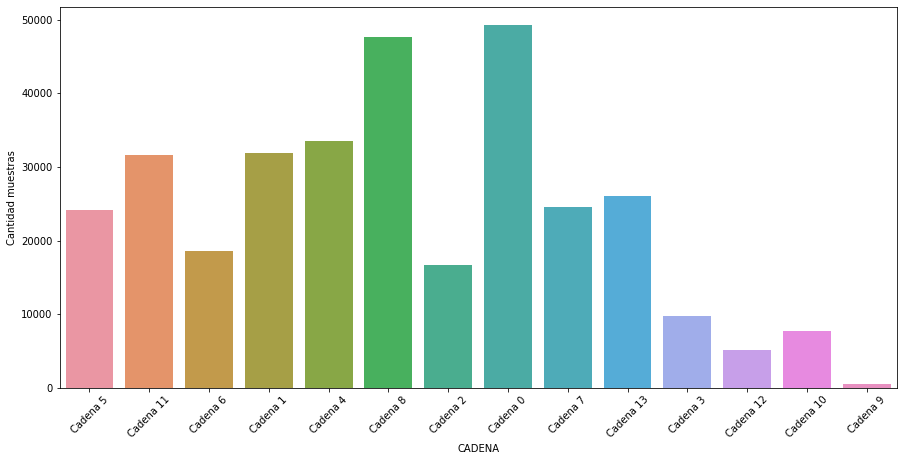

In [20]:
plt.figure(figsize=(15,7))
sns.countplot(x= "CADENA" , data = Faltante_gondola) 
plt.xlabel("CADENA")
plt.ylabel("Cantidad muestras")
plt.xticks(rotation=45)
plt.show()

In [21]:
Faltante_gondola['STOCK_CD'].describe()

count     326928
unique     10279
top            0
freq      112332
Name: STOCK_CD, dtype: object

In [22]:

Muestrasproveedores=(Faltante_gondola[['PROVEEDOR', 'IDRENGLON']].groupby(['PROVEEDOR']).count()).sort_values(by='IDRENGLON',ascending= False)
Muestrasproveedores.head(5)
totalpro=Muestrasproveedores.sum()
porcentajepro=(Muestrasproveedores/totalpro)*100
Muestrasproveedores['Porcentaje']=porcentajepro
Muestrasproveedores.head(5)


,IDRENGLON,Porcentaje
PROVEEDOR,,
Proveedor 46,30411,9.302048
Proveedor 626,24270,7.423653
Proveedor 443,22940,7.016836
Proveedor 442,15160,4.637107
Proveedor 121,10157,3.106800


In [23]:

Muestrascategoria=(Faltante_gondola[['CAT2', 'IDRENGLON']].groupby(['CAT2']).count()).sort_values(by='IDRENGLON',ascending= False)
Muestrascategoria.head(5)
totalcat=Muestrascategoria.sum()
porcentajecat=(Muestrascategoria/totalcat)*100
Muestrascategoria['Porcentaje']=porcentajecat
Muestrascategoria.head(5)



,IDRENGLON,Porcentaje
CAT2,,
GALLETITAS DULCES,13382,4.093256
CERVEZA,12373,3.784625
JUGOS EN POLVO,12133,3.711215
FIDEOS SECOS,9371,2.866380
GASEOSAS,7674,2.347306


([<matplotlib.patches.Wedge at 0x198aa358>,
 [Text(-0.48996692994364777, 1.417720849660326, 'GALLETITAS DULCES'),
  Text(-1.24000564200028, 0.8440296249584331, 'CERVEZA'),
  Text(-1.499896909766644, -0.0175857917783736, 'JUGOS EN POLVO'),
  Text(-1.2815747327914213, -0.7794653323083697, 'FIDEOS SECOS'),
  Text(-0.8476181271632339, -1.2375554575469707, 'GASEOSAS'),
  Text(-0.3615552292484956, -1.4557739577980737, 'SHAMPOO, ACONDICIONADOR Y CUIDADOS DEL CABELLO'),
  Text(0.10669516636211382, -1.4962005685986624, 'CREMA CORPORAL Y MANOS'),
  Text(0.536053826758879, -1.4009447864984408, 'AGUA SABORIZADA'),
  Text(0.9047021198855554, -1.1964589730845694, 'JABON DE TOCADOR'),
  Text(1.1883241442153263, -0.9153609824953829, 'YERBA'),
  Text(1.3841632667728032, -0.578006964418978, 'CREMA DENTAL'),
  Text(1.484047203784422, -0.2181831729067082, 'AGUA MINERAL SIN GAS'),
  Text(1.4943180988108802, 0.1304354996396177, 'DESODORANTE Y COLONIA FEMENINO'),
  Text(1.4275016730252759, 0.4606940128871202

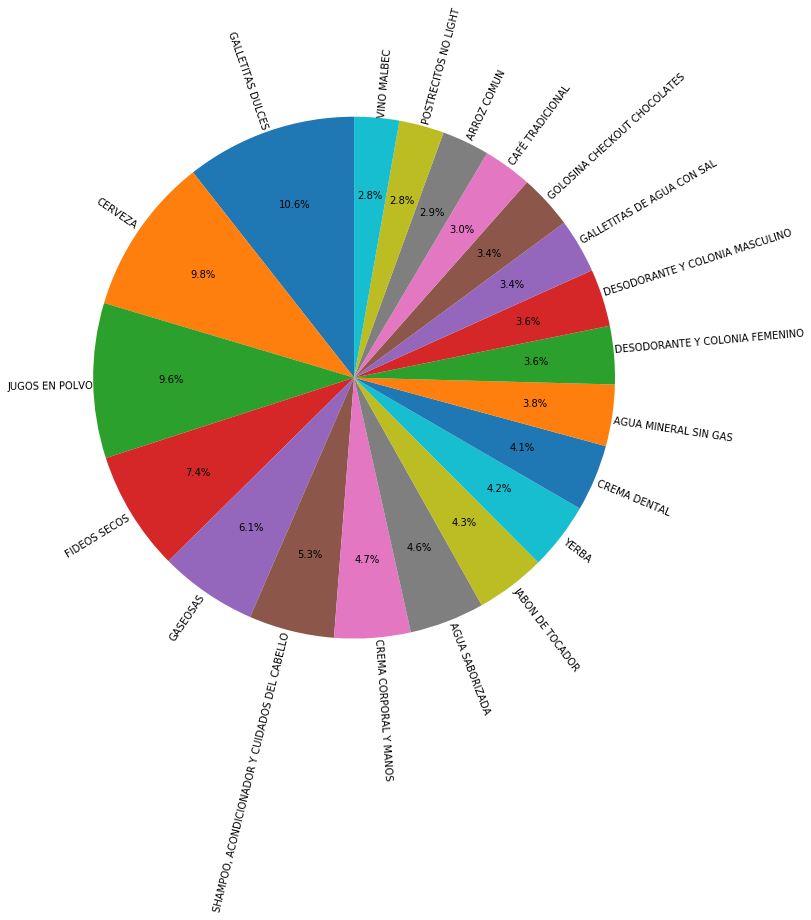

In [24]:
grafico_categorías = Muestrascategoria.iloc[0:20,:]
graf=grafico_categorías.index
dat=grafico_categorías.Porcentaje
plt.figure(figsize=(10,8))
plt.axis('equal')
plt.pie(dat, labels=graf,autopct='%1.1f%%', startangle=90,labeldistance=1,pctdistance=0.7,rotatelabels=True,radius=1.5)

In [25]:

MuestrasZONA=(Faltante_gondola[['ZONA', 'IDRENGLON']].groupby(['ZONA']).count()).sort_values(by='IDRENGLON',ascending= False)
MuestrasZONA.head(5)
totalZONA=MuestrasZONA.sum()
porcentajeZONA=(MuestrasZONA/totalZONA)*100
MuestrasZONA['Porcentaje']=porcentajeZONA
MuestrasZONA.head(5)


,IDRENGLON,Porcentaje
ZONA,,
GBA,75254,23.018524
CABA,71250,21.793789
CORDOBA,21175,6.476961
NEUQUEN,19169,5.863371
MENDOZA,18746,5.733984


([<matplotlib.patches.Wedge at 0x17d341d0>,
 [Text(-0.9926224209244819, 1.1245891380757778, 'GBA                                               '),
  Text(-1.2707453959524597, -0.7969982049324995, 'CABA                                              '),
  Text(-0.18324949711407018, -1.4887644614939735, 'CORDOBA                                           '),
  Text(0.3931688744964359, -1.4475559526758217, 'NEUQUEN                                           '),
  Text(0.8831744397731762, -1.2124367649206849, 'MENDOZA                                           '),
  Text(1.2117743457410055, -0.884083104127637, 'BAHIA BLANCA                                      '),
  Text(1.3896436977414994, -0.5647038102645777, 'RAFAELA                                           '),
  Text(1.477133120850916, -0.26091711957101116, 'PARANA                                            '),
  Text(1.4997948810547328, 0.024805538938310622, 'C RIVADAVIA                                       '),
  Text(1.469970545938203, 

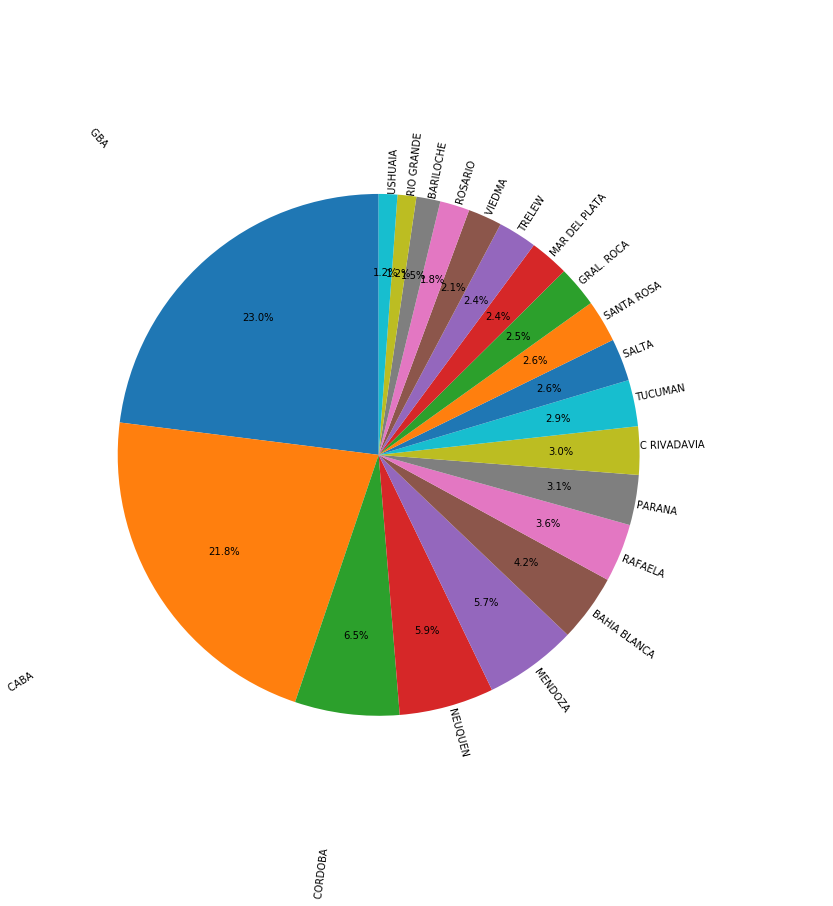

In [26]:
y =MuestrasZONA.index
datos=MuestrasZONA.Porcentaje
plt.figure(figsize=(10,8))
plt.axis('equal')
plt.pie(datos, labels=y,autopct='%1.1f%%', startangle=90,labeldistance=1,pctdistance=0.7,rotatelabels=True,radius=1.5)

In [27]:
Faltante_gondola.replace({'QUIEBRE': "N"}, int(0), inplace=True)
Faltante_gondola.replace({'QUIEBRE': "S"}, int(1), inplace=True)
Faltante_gondola.QUIEBRE


0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
         ..
326898    1
326899    1
326900    1
326901    0
326902    0
326903    0
326904    0
326905    0
326906    1
326907    1
326908    1
326909    1
326910    1
326911    1
326912    0
326913    1
326914    0
326915    0
326916    0
326917    0
326918    0
326919    0
326920    0
326921    0
326922    1
326923    1
326924    1
326925    1
326926    1
326927    1
Name: QUIEBRE, Length: 326928, dtype: int64

In [28]:
Faltante_gondola.replace({'ANIO': 20192}, int(2019), inplace=True)

In [29]:
Quiebre = Faltante_gondola.loc[Faltante_gondola['QUIEBRE']==1]
np.shape(Quiebre)

(28638, 22)

In [30]:
Producto_más_quiebre=(Quiebre[['CODIGO_EAN', 'QUIEBRE']].groupby(['CODIGO_EAN']).count()).sort_values(by='QUIEBRE',ascending= False)
Producto_más_quiebre.head(5)


,QUIEBRE
CODIGO_EAN,
Producto 4681,276
Producto 6124,259
Producto 5936,254
Producto 1896,241
Producto 8590,217


In [31]:
Cadena_más_quiebre=(Quiebre[['CADENA', 'QUIEBRE']].groupby(['CADENA']).count()).sort_values(by='QUIEBRE',ascending= False)
total= Cadena_más_quiebre.sum()
porcentaje=(Cadena_más_quiebre/total)*100
Cadena_más_quiebre['Porcentaje']=porcentaje
Cadena_más_quiebre.head(5)

,QUIEBRE,Porcentaje
CADENA,,
Cadena 11,3872,13.520497
Cadena 1,3529,12.322788
Cadena 6,3120,10.894616
Cadena 0,2969,10.367344
Cadena 8,2617,9.138208


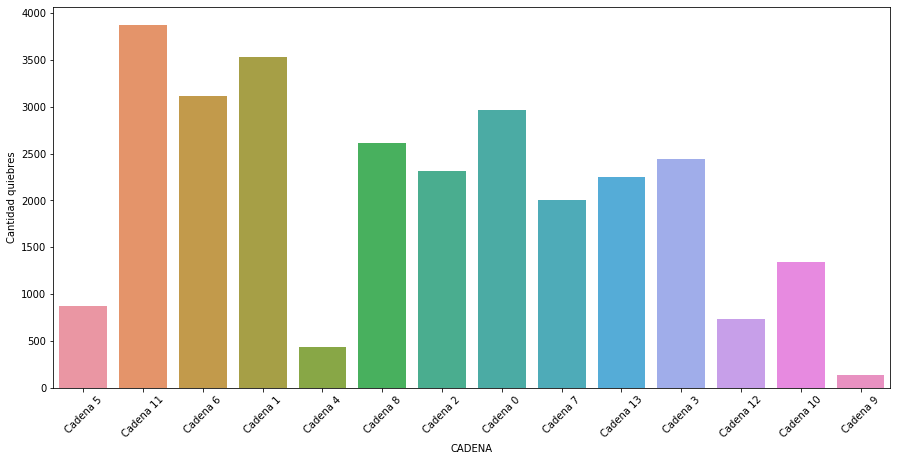

In [32]:
plt.figure(figsize=(15,7))
sns.countplot(x= "CADENA" , data = Quiebre) 
plt.xlabel("CADENA")
plt.ylabel("Cantidad quiebres")
plt.xticks(rotation=45)
plt.show()

In [33]:
Categoría_más_quiebre=(Quiebre[['CAT2', 'QUIEBRE']].groupby(['CAT2']).count()).sort_values(by='QUIEBRE',ascending= False)
Categoría_más_quiebre.head(5)

,QUIEBRE
CAT2,
CERVEZA,2667
FIDEOS SECOS,915
CREMA CORPORAL Y MANOS,912
GALLETITAS DULCES,833
JUGOS EN POLVO,750


In [34]:
Proveedor_más_quiebre=(Quiebre[['PROVEEDOR', 'QUIEBRE']].groupby(['PROVEEDOR']).count()).sort_values(by='QUIEBRE',ascending= False)
Proveedor_más_quiebre.head(5)

,QUIEBRE
PROVEEDOR,
Proveedor 443,3434
Proveedor 126,2452
Proveedor 46,2063
Proveedor 66,1842
Proveedor 442,927


In [35]:
Zona_más_quiebre=(Quiebre[['ZONA', 'QUIEBRE']].groupby(['ZONA']).count()).sort_values(by='QUIEBRE',ascending= False)
Zona_más_quiebre.head(5)

,QUIEBRE
ZONA,
CABA,5422
GBA,3994
CORDOBA,3733
BAHIA BLANCA,2094
NEUQUEN,1697


In [36]:
Tamanio_más_quiebre=(Quiebre[['C_TAMANIO', 'QUIEBRE']].groupby(['C_TAMANIO']).count()).sort_values(by='QUIEBRE',ascending= False)
Tamanio_más_quiebre.head(5)

,QUIEBRE
C_TAMANIO,
HIPER A,7572
SUPER,6683
MINI,4479
FARMA,3990
HIPER B,3331


In [37]:
Rotaciontotal=(Faltante_gondola[['IDROTACION', 'IDRENGLON']].groupby(['IDROTACION']).count()).sort_values(by='IDRENGLON',ascending= False)
Rotaciontotal['Rot_quiebre']=(Quiebre[['IDROTACION', 'QUIEBRE']].groupby(['IDROTACION']).count()).sort_values(by='QUIEBRE',ascending= False)
Rotaciontotal.head(5)

,IDRENGLON,Rot_quiebre
IDROTACION,,
A,210915,10906
B,51838,3528
C,15029,1405


In [38]:
total_rotacion=Rotaciontotal['IDRENGLON'].sum()
porcentaje_rot_total=(Rotaciontotal['IDRENGLON']/total_rotacion)*100
Rotaciontotal['Porcentaje_total']=porcentaje_rot_total
total_rotacion_quiebre=Rotaciontotal['Rot_quiebre'].sum()
porcentaje_rot_quiebre=(Rotaciontotal['Rot_quiebre']/total_rotacion_quiebre)*100
Rotaciontotal['Porcentaje_quiebre']=porcentaje_rot_quiebre
Rotaciontotal['Quiebre/Total']=(Rotaciontotal['Rot_quiebre']/Rotaciontotal['IDRENGLON'])*100
Rotaciontotal.head(5)


,IDRENGLON,Rot_quiebre,Porcentaje_total,Porcentaje_quiebre,Quiebre/Total
IDROTACION,,,,,
A,210915,10906,75.928246,68.855357,5.170803
B,51838,3528,18.661396,22.274133,6.805818
C,15029,1405,5.410358,8.870510,9.348593


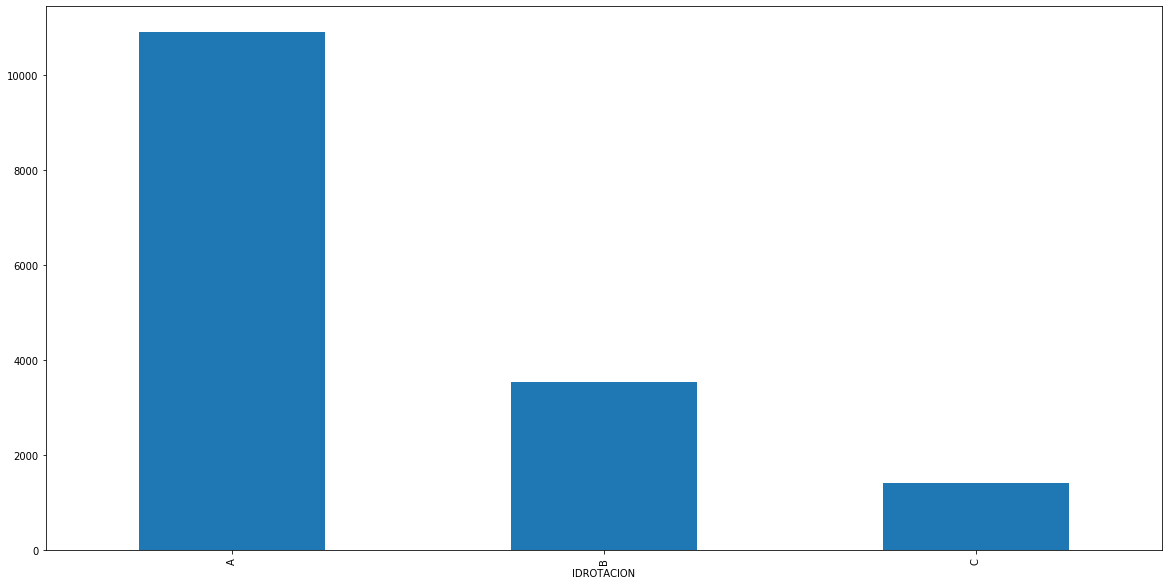

In [39]:
graficorotacion=Rotaciontotal.iloc[:,1]
graficorotacion.plot.bar(figsize=(20,10))


In [40]:
Proveedor_443= Quiebre.loc[Quiebre['PROVEEDOR']=='Proveedor 443']
np.shape(Proveedor_443)

(3434, 22)

In [41]:
Categoría_más_quiebre_443=(Proveedor_443[['CAT2', 'QUIEBRE']].groupby(['CAT2']).count()).sort_values(by='QUIEBRE',ascending= False)
Categoría_más_quiebre_443.head(5)

,QUIEBRE
CAT2,
GOLOSINA GONDOLA TABLETAS CHOCOLATE,662
JUGOS EN POLVO,606
GOLOSINA CHECKOUT CHOCOLATES,383
GOLOSINA CHECKOUT CHICLES,354
POLVO GELATINA,312


In [42]:
df2 = (Quiebre.groupby(('CAT2', 'IDROTACION')).QUIEBRE.count()).sort_values(ascending=False)
df2 = df2.to_frame()
df2.head(5)

C:\Users\la02964\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  """Entry point for launching an IPython kernel.


,,QUIEBRE
CAT2,IDROTACION,
FIDEOS SECOS,A,464
GALLETITAS DULCES,A,457
JUGOS EN POLVO,A,292
TOMATE EN LATA Y DP,A,270
GASEOSAS,A,252


In [43]:
Faltante_gondola.to_excel(r'd:\LocalData\la02964\Desktop\Ciencia de Datos\Faltante gondola.xlsx')